In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

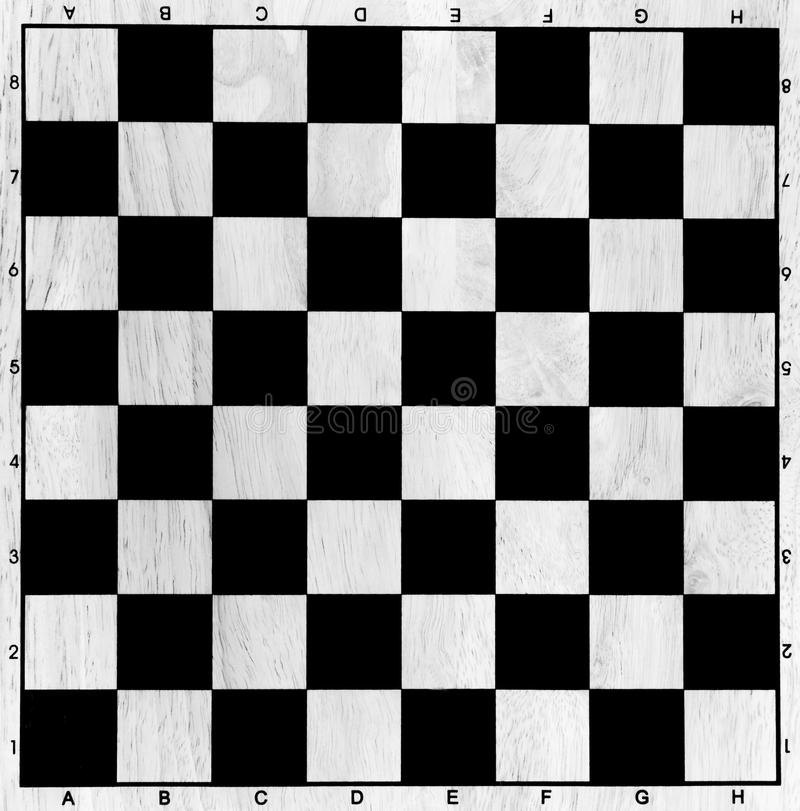

In [ ]:
img = cv2.imread('image1.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

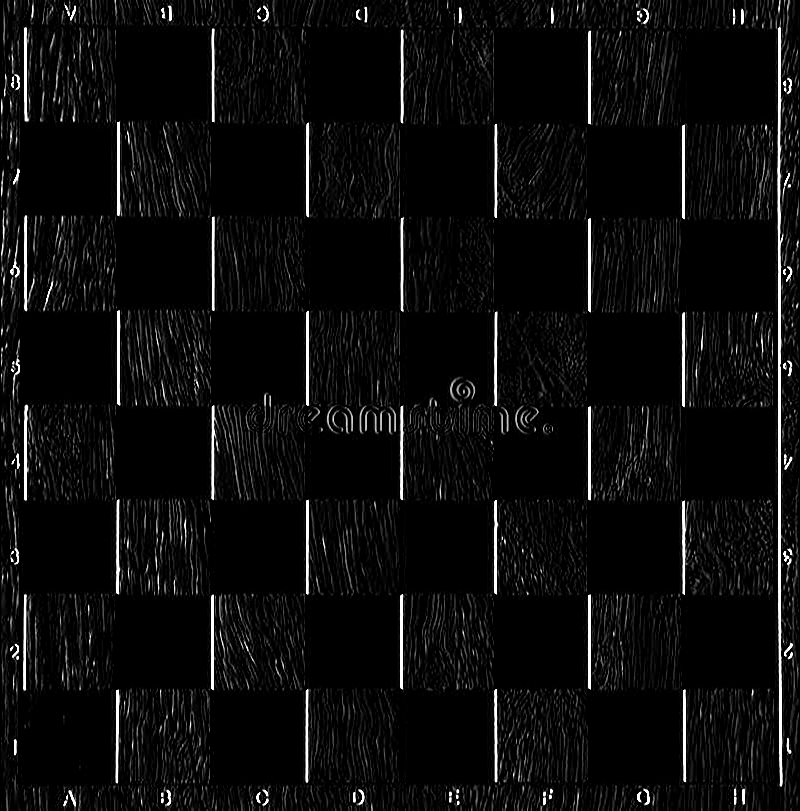

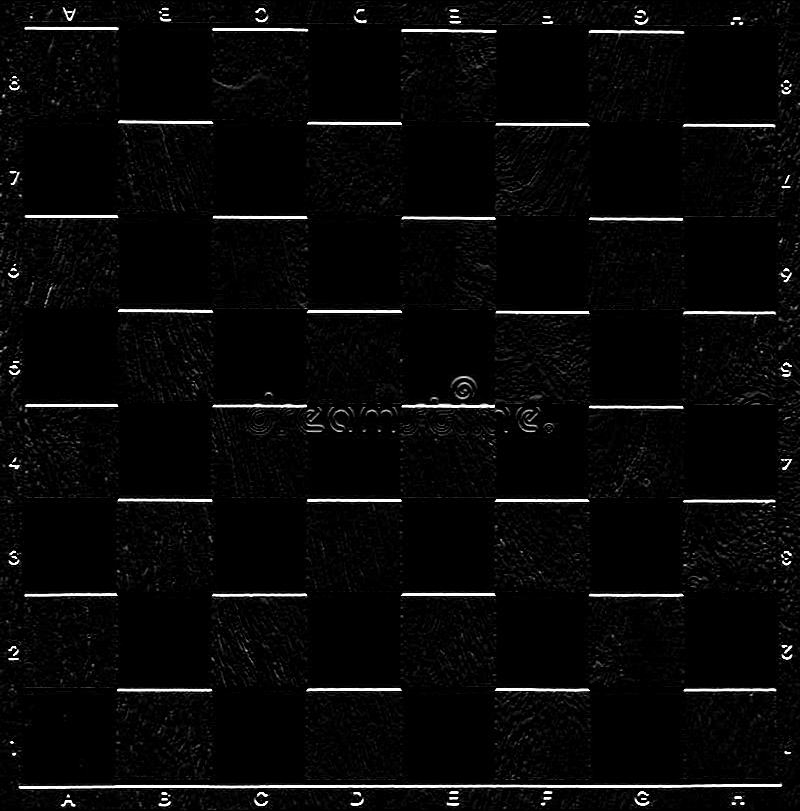

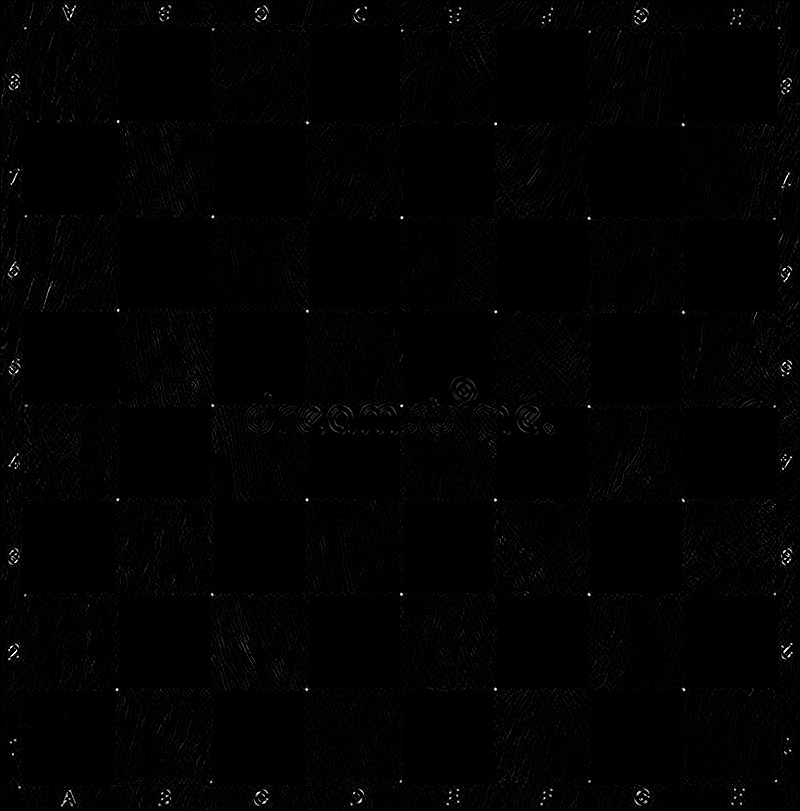

In [ ]:
#mencari gradient
img_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)
img_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)
img_sobel = cv2.Sobel(img_gray, cv2.CV_64F, 1, 1)
cv2_imshow(img_x)
cv2_imshow(img_y)
cv2_imshow(img_sobel)

In [ ]:
img_xx = np.multiply(img_x, img_x)
img_xy = np.multiply(img_x, img_y)
img_yy = np.multiply(img_y, img_y)

In [ ]:
#untuk gaussian filter saya menggunakan GaussianBlur
gaus_xx = cv2.GaussianBlur(img_xx, (5,5), 0)
gaus_xy = cv2.GaussianBlur(img_xy, (5,5), 0)
gaus_yy = cv2.GaussianBlur(img_yy, (5,5), 0)

In [ ]:
#mendapatkan R untuk respon setiap corner
k = .04
det_h = np.multiply(gaus_xx, gaus_yy) - np.multiply(gaus_xy, gaus_xy)
trace_h = gaus_xx + gaus_yy
R = det_h - k*np.multiply(trace_h, trace_h)

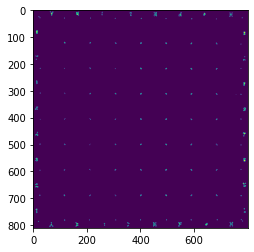

In [ ]:
ratio = .23 #dimainkan hingga sesuai agresif lembutnya
thresh = abs(R) > ratio * abs(R).max()

plt.imshow(thresh)

In [ ]:
#Menghitung suppresionnya untuk menghilangkan overlapping

non_zero_cords = np.nonzero(thresh)
tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 
values = [abs(R)[i, j] for i, j in tuple_cords]
sorted_cords = [tuple_cords[i] for i in np.argsort(values)[::-1]]
distance = 50
nms_cords = []
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance:
            break
    else:
        nms_cords.append(cord)

print ("sebelum NMS = {} ".format(len(thresh)))
print ("sesudah NMS = {} ".format(len(nms_cords)))

sebelum NMS = 811 
sesudah NMS = 82 


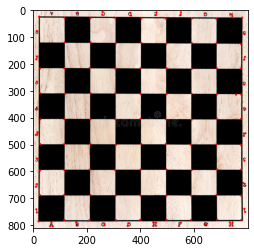

In [ ]:
#hasil image setelah di normalisasi
for nms_cord in nms_cords:
    cv2.circle(img, (nms_cord[1], nms_cord[0]), 4, (0, 0, 255), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))